# Imports

In [1]:
!pwd
import os
import shutil
import matplotlib.pyplot as plt
import numpy
import pandas

from molgroups.support import molstat
from molgroups.ml import playground

import pickle
def fnSaveObject(save_object, sFileName):
    with open(sFileName, "wb") as file:
        pickle.dump(save_object, file)

# always use the same testdata
shutil.copyfile('./bu/sim.dat', os.getcwd()+'/sim.dat')

/Users/frank/Dropbox/My Mac (PN115993.campus.nist.gov)/Documents/programming/molgroups/examples/ml/EllipsoidProtein_SingleDataset


/Users/frank/opt/anaconda3/envs/Python39/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'/Users/frank/Dropbox/My Mac (PN115993.campus.nist.gov)/Documents/programming/molgroups/examples/ml/EllipsoidProtein_SingleDataset/sim.dat'

# Variables

In [2]:
# Run Optimization or only example fit and data simulation
RunFit=True

# Folders and fit application
store = "T"
setupdir = os.getcwd()
runfile = "ellipsoid"
fitsource = "SASView"

# MCMC fit iterations in example fit and optimization
burn=500
steps=500

# enforced qmin and qmax, even if detector would cover larger q-range
# alternatively: take enforced q-range from first provided data file (index 0)
# set total counting time for the entire experiment (in s), or None
# number of gpcam iterations, if gpcam is used
qmin = 0.01
qmax = 0.8
qrangefromfile = False
t_total = None
optimizer = 'grid'  # optimizer can be 'grid' or gpcam
fitter = 'MCMC'  # fit driver for optimization either 'MCMC' or 'LM'
remove_fit_dir = False # Keep fit directories for inspection of individual simulated fits

# Create Fit Scripts for all Models

1.  The model needs to define fittable parameters with unique names, as shown below. For example, model0.scale and model1.scale would not be unique, since both parameters would be internally named 'scale' by bumps. In such a case, define parameters using the Parameter method and assign them to the models afterwards.

In [3]:
%%writefile ellipsoid.py
from bumps.names import *
from sasmodels.core import load_model
from sasmodels.bumps_model import Model, Experiment
from sasmodels.data import load_data

# IMPORT THE DATA USED
data = load_data('sim.dat')

# DEFINE THE MODEL
kernel = load_model('ellipsoid')

pars = dict(scale=1.0, background=0.0005, sld=3.4, sld_solvent=6.4, radius_polar=14.0,
            radius_equatorial=12.0)

model = Model(kernel, **pars)

# PARAMETER RANGES (ONLY THOSE PARAMETERS ARE FITTED)
model.scale.range(0.001, 1.)
# model.background.range(0, 1)
model.sld.range(-1, 7)
model.sld_solvent.range(-1, 7)
model.radius_polar.range(10, 200)
model.radius_equatorial.range(10, 200)

M = Experiment(data=data, model=model)
problem = FitProblem(M)

Overwriting ellipsoid.py


In [4]:
%%writefile core_shell_ellipsoid.py
from bumps.names import *
from sasmodels.core import load_model
from sasmodels.bumps_model import Model, Experiment
from sasmodels.data import load_data

# IMPORT THE DATA USED
data = load_data('sim.dat')

# DEFINE THE MODEL
kernel = load_model('core_shell_ellipsoid')

pars = dict(scale=1.0, background=0.0005, radius_equat_core=10, x_core=1.5, thick_shell=10, x_polar_shell=1.5, sld_core=3.4, sld_shell=3.5,  sld_solvent=6.4)

model = Model(kernel, **pars)

# PARAMETER RANGES (ONLY THOSE PARAMETERS ARE FITTED)
model.scale.range(0.001, 1.)
# model.background.range(0, 1)
model.radius_equat_core.range(10, 200)
model.x_core.range(1.0, 10.)
model.thick_shell.range(10., 200.)
model.x_polar_shell.range(1.0, 10.0)
model.sld_core.range(-1, 7)
model.sld_shell.range(-1, 7.)
model.sld_solvent.range(-1, 7.)

M = Experiment(data=data, model=model)
problem = FitProblem(M)

Overwriting core_shell_ellipsoid.py


In [5]:
%%writefile cylinder.py
from bumps.names import *
from sasmodels.core import load_model
from sasmodels.bumps_model import Model, Experiment
from sasmodels.data import load_data

# IMPORT THE DATA USED
data = load_data('sim.dat')

# DEFINE THE MODEL
kernel = load_model('cylinder')

pars = dict(scale=1.0, background=0.0005, sld=3.4, sld_solvent=6.4, radius=14.0,
            length=12.0)

model = Model(kernel, **pars)

# PARAMETER RANGES (ONLY THOSE PARAMETERS ARE FITTED)
model.scale.range(0.001, 1.)
# model.background.range(0, 1)
model.sld.range(-1, 7)
model.sld_solvent.range(-1, 7)
model.radius.range(10, 200)
model.length.range(10, 200)

M = Experiment(data=data, model=model)
problem = FitProblem(M)

Overwriting cylinder.py


In [6]:
%%writefile core_shell_cylinder.py
from bumps.names import *
from sasmodels.core import load_model
from sasmodels.bumps_model import Model, Experiment
from sasmodels.data import load_data

# IMPORT THE DATA USED
data = load_data('sim.dat')

# DEFINE THE MODEL
kernel = load_model('core_shell_cylinder')

pars = dict(scale=1.0, background=0.0005, sld_core=3.4, sld_shell=3.4, sld_solvent=6.4, radius=14.0, thickness=10.0,
            length=12.0)

model = Model(kernel, **pars)

# PARAMETER RANGES (ONLY THOSE PARAMETERS ARE FITTED)
model.scale.range(0.001, 1.)
# model.background.range(0, 1)
model.sld_core.range(-1, 7)
model.sld_shell.range(-1, 7)
model.sld_solvent.range(-1, 7)
model.radius.range(10, 200)
model.thickness.range(10,200)
model.length.range(10, 200)

M = Experiment(data=data, model=model)
problem = FitProblem(M)

Overwriting core_shell_cylinder.py


In [7]:
%%writefile lamellar.py
from bumps.names import *
from sasmodels.core import load_model
from sasmodels.bumps_model import Model, Experiment
from sasmodels.data import load_data

# IMPORT THE DATA USED
data = load_data('sim.dat')

# DEFINE THE MODEL
kernel = load_model('lamellar')

pars = dict(scale=1.0, background=0.0005, thickness=10.0, sld=3.4, sld_solvent=6.4)

model = Model(kernel, **pars)

# PARAMETER RANGES (ONLY THOSE PARAMETERS ARE FITTED)
model.scale.range(0.001, 1.)
# model.background.range(0, 1)
model.thickness.range(10,200)
model.sld.range(-1, 7)
model.sld_solvent.range(-1, 7)

M = Experiment(data=data, model=model)
problem = FitProblem(M)

Overwriting lamellar.py


In [8]:
%%writefile three_pearl_necklace.py
from bumps.names import *
from sasmodels.core import load_model
from sasmodels.bumps_model import Model, Experiment
from sasmodels.data import load_data

# IMPORT THE DATA USED
data = load_data('sim.dat')

# DEFINE THE MODEL
kernel = load_model('pearl_necklace')

pars = dict(scale=1.0, background=0.0005, radius=10.0, edge_sep=350, thick_string=2.5, num_pearls=3, sld=3.4, sld_string=3.4, sld_solvent=6.4)

model = Model(kernel, **pars)

# PARAMETER RANGES (ONLY THOSE PARAMETERS ARE FITTED)
model.scale.range(0.001, 1.)
# model.background.range(0, 1)
model.radius.range(10, 200.)
model.edge_sep.range(200., 700.)
model.thick_string.range(2., 20.)
model.sld.range(-1, 7)
model.sld_string.range(-1, 7.)
model.sld_solvent.range(-1, 7.)

M = Experiment(data=data, model=model)
problem = FitProblem(M)

Overwriting three_pearl_necklace.py


## Instrument Configuration

In [9]:
sb = 0.059
configuration_dataset1 = [{'lambda': 6.21,
                            "sample_detector_distance": 100,
                            'source_sample_distance': 387.6,
                            'source_aperture_radius':5.08*0.5,
                            'sample_aperture_radius':1.27*0.5,
                            "beamstop_diameter": 10.16,
                            "neutron_flux": 5e4,
                            'time': 1600,
                            'beam_center_x': 25,
                            "dlambda_lambda":0.136,
                            "differential_cross_section_buffer": sb},
                          {'lambda': 6.21,
                           "sample_detector_distance": 400,
                           'source_sample_distance': 850.05,
                           'source_aperture_radius':5.08*0.5,
                           'sample_aperture_radius':1.27*0.5,
                           "beamstop_diameter": 10.16,
                           "neutron_flux": 4e4,
                           'time': 3600,
                           "dlambda_lambda":0.136,
                           "differential_cross_section_buffer": sb},
                         {'lambda': 6.21,
                          "sample_detector_distance": 1300,
                          'source_sample_distance': 1467,
                          'source_aperture_radius':5.08*0.5,
                          'sample_aperture_radius':1.27*0.5,
                          "dlambda_lambda":0.136,
                          "beamstop_diameter": 10.16,
                          "neutron_flux": 4e4,
                          'time': 4400,
                          "differential_cross_section_buffer": sb}]

configuration = [configuration_dataset1]

df = pandas.DataFrame.from_dict(configuration_dataset1)
df

,lambda,sample_detector_distance,source_sample_distance,source_aperture_radius,sample_aperture_radius,beamstop_diameter,neutron_flux,time,beam_center_x,dlambda_lambda,differential_cross_section_buffer
0,6.21,100,387.60,2.54,0.635,10.16,50000.0,1600,25.0,0.136,0.059
1,6.21,400,850.05,2.54,0.635,10.16,40000.0,3600,NaN,0.136,0.059
2,6.21,1300,1467.00,2.54,0.635,10.16,40000.0,4400,NaN,0.136,0.059


# Run Example Fit

# steps: 500, # draws: 25000
step 1 cost 769.073(26)
                       radius_equatorial ..|.......    57.1603 in (10,200)
                            radius_polar .....|....    105.525 in (10,200)
                                   scale |.........  0.0332917 in (0.001,1)
                                     sld .....|....    3.15481 in (-1,7)
                             sld_solvent ....|.....    2.85453 in (-1,7)
step 28 cost 12.112(26)
step 42 cost 2.166(26)
step 57 cost 2.166(26)
step 83 cost 1.070(26)
step 107 cost 0.863(26)
step 130 cost 0.863(26)
step 154 cost 0.863(26)
step 184 cost 0.863(26)
step 212 cost 0.863(26)
step 241 cost 0.784(26)
step 273 cost 0.729(26)
step 306 cost 0.729(26)
step 340 cost 0.729(26)
step 375 cost 0.729(26)
step 410 cost 0.729(26)
step 443 cost 0.729(26)
step 477 cost 0.729(26)
step 511 cost 0.729(26)
step 545 cost 0.729(26)
step 578 cost 0.710(26)
step 611 cost 0.710(26)
step 644 cost 0.710(26)
step 676 cost 0.685(26)
step 707 cost 0.685(26)
st

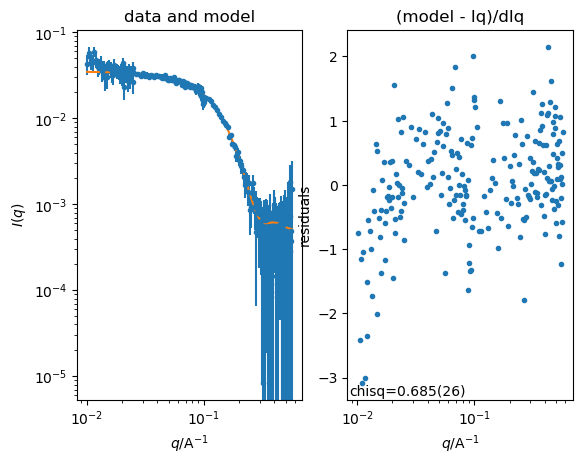

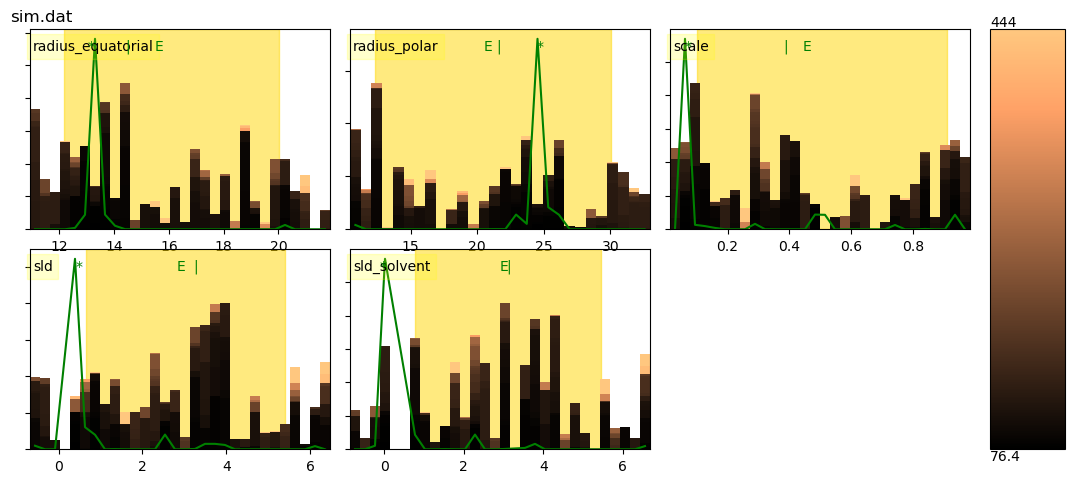

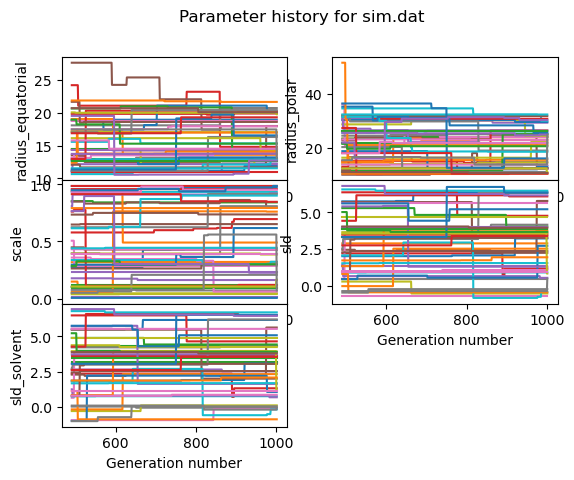

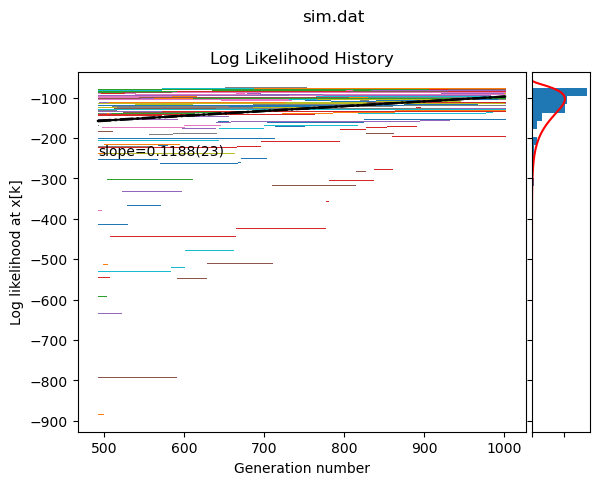

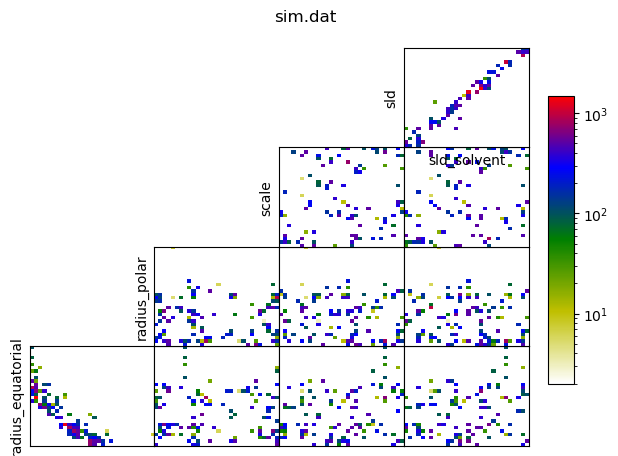

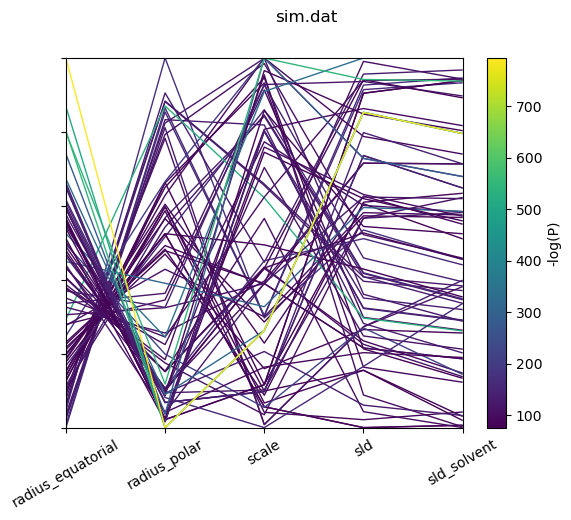

In [10]:
fitobj = molstat.CMolStat(
    fitsource=fitsource,
    spath=setupdir,
    mcmcpath=store,
    runfile=runfile,
    state=None,
    problem=None,
)

if RunFit:
    # remove store directory if it already exists, since we do not want to reload here
    if os.path.isdir(os.path.join(setupdir, store)):
        shutil.rmtree(os.path.join(setupdir, store))
    fitobj.Interactor.fnRunMCMC(burn, steps, batch=False)

fitobj.fnRestoreFit()

## Test Data Simulation
### 1. Show Best-fit parameters from above fit

In [11]:
fitobj.fnLoadParameters()
pf = pandas.DataFrame(fitobj.diParameters)
pf

,radius_equatorial,radius_polar,scale,sld,sld_solvent
number,0,1,2,3,4
lowerlimit,10.0,10.0,0.001,-1.0,-1.0
upperlimit,200.0,200.0,1.0,7.0,7.0
value,13.148129,24.743818,0.071066,0.479654,-0.040499
relval,0.016569,0.077599,0.070136,0.184957,0.119938
variable,radius_equatorial,radius_polar,scale,sld,sld_solvent
error,0.01,0.01,0.01,0.01,0.01


2. Define simulation model parameters. They are written out to simpar.dat. Please change to desired values or copy from dataframe above.

In [12]:
simpar = pandas.DataFrame(pf.loc['value'])
simpar.reset_index(inplace=True)
simpar.columns = ['par', 'value']
simpar

,par,value
0,radius_equatorial,13.148129
1,radius_polar,24.743818
2,scale,0.071066
3,sld,0.479654
4,sld_solvent,-0.040499


3. Simulate data.

In [13]:
fitobj.fnSimulateData(basefilename='sim.dat', liConfigurations=configuration, qmin=qmin, qmax=qmax, t_total=None, simpar=simpar, average=True)

                 par      value
0  radius_equatorial  13.148129
1       radius_polar  24.743818
2              scale   0.071066
3                sld   0.479654
4        sld_solvent  -0.040499
[[{'lambda': 6.21, 'sample_detector_distance': 100, 'source_sample_distance': 387.6, 'source_aperture_radius': 2.54, 'sample_aperture_radius': 0.635, 'beamstop_diameter': 10.16, 'neutron_flux': 50000.0, 'time': 1600, 'beam_center_x': 25, 'dlambda_lambda': 0.136, 'differential_cross_section_buffer': 0.059}, {'lambda': 6.21, 'sample_detector_distance': 400, 'source_sample_distance': 850.05, 'source_aperture_radius': 2.54, 'sample_aperture_radius': 0.635, 'beamstop_diameter': 10.16, 'neutron_flux': 40000.0, 'time': 3600, 'dlambda_lambda': 0.136, 'differential_cross_section_buffer': 0.059}, {'lambda': 6.21, 'sample_detector_distance': 1300, 'source_sample_distance': 1467, 'source_aperture_radius': 2.54, 'sample_aperture_radius': 0.635, 'dlambda_lambda': 0.136, 'beamstop_diameter': 10.16, 'neutron_flux

/Users/frank/opt/anaconda3/envs/Python39/lib/python3.9/site-packages/sasmodels/bumps_model.py:243: RuntimeWarning: divide by zero encountered in divide
  return (self.theory() - self.Iq) / self.dIq
/Users/frank/opt/anaconda3/envs/Python39/lib/python3.9/site-packages/sasmodels/bumps_model.py:243: RuntimeWarning: invalid value encountered in divide
  return (self.theory() - self.Iq) / self.dIq


[[[],
              Q         I        dI        dQ
  31   0.010000  0.033193  0.005385  0.001143
  32   0.010395  0.050961  0.006802  0.001154
  33   0.010806  0.021524  0.006546  0.001165
  34   0.011234  0.027841  0.006300  0.001178
  35   0.011678  0.030014  0.006063  0.001191
  ..        ...       ...       ...       ...
  131  0.483226  0.000411  0.000121  0.027374
  132  0.502333  0.000601  0.000119  0.028415
  133  0.522196  0.000724  0.000146  0.029498
  134  0.542844  0.000285  0.000204  0.030626
  135  0.564308  0.000608  0.000408  0.031799
  
  [105 rows x 4 columns]]]

### Compare original and simulated data.
1. Compare Data

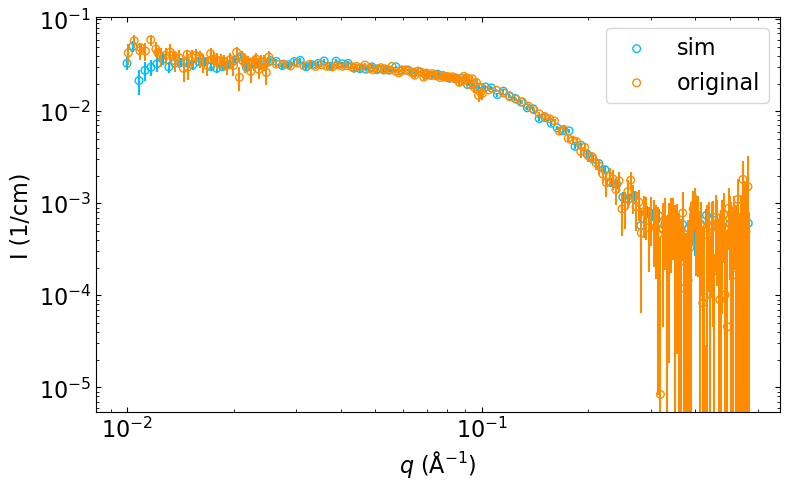

In [14]:
import pandas

fig, ax = plt.subplots()

original = pandas.read_csv('bu/sim.dat', sep=' ', skip_blank_lines=True,comment='#')
simdata = pandas.read_csv('sim.dat', sep=' ', skip_blank_lines=True,comment='#')

ax.errorbar(simdata['Q'], simdata['I'], simdata['dI'], ls='none', color='deepskyblue')
ax.scatter(simdata['Q'], simdata['I'], s=30, marker='o', facecolors='none', edgecolors='deepskyblue', label='sim')
ax.errorbar(original['Q'], original['I'], original['dI'], ls='none', color='darkorange')
ax.scatter(original['Q'], original['I'], s=30, marker='o', facecolors='none', edgecolors='darkorange', label='original')

ax.legend(fontsize=16)
ax.set_ylabel("I (1/cm)", fontsize=16)
ax.set_yscale('log')
ax.set_xscale('log')
ax.minorticks_on()
ax.tick_params(which="both", direction="in", labelsize=16)
ax.tick_params(bottom=True, top=True, left=True, right=True, which="both")
ax.set_xlabel("$q$ (Å$^{-1}$)", fontsize=16)
ax.figure.set_size_inches(8, 5)
#ax.set_ylim(1e-2, .1)
plt.tight_layout()
plt.savefig(store + "/intensity_comparison.png", facecolor="white")
plt.show()


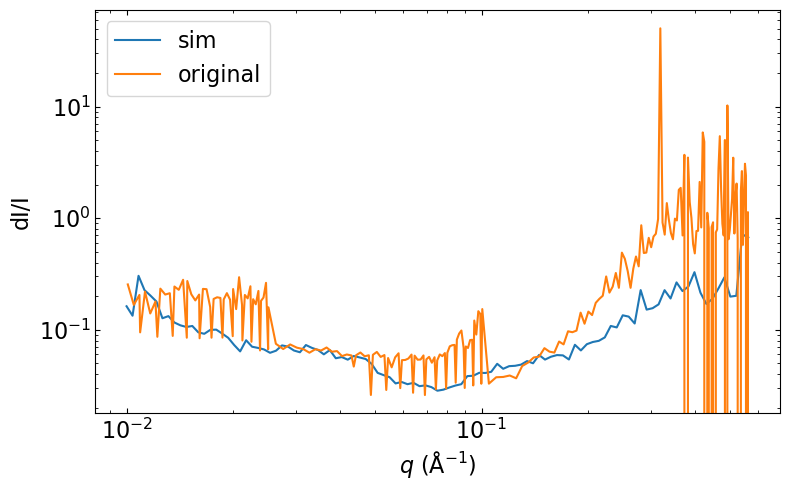

In [15]:
fig, ax = plt.subplots()

#i = 0
#while os.path.isfile('testdata.DAT'):
original = pandas.read_csv('bu/sim.dat', sep=' ', skip_blank_lines=True,comment='#')
simdata = pandas.read_csv('sim.dat', sep=' ', skip_blank_lines=True,comment='#')

ax.plot(simdata['Q'], (simdata['dI']/simdata['I']), label="sim")
ax.plot(original['Q'], (original['dI']/original['I']), label="original")

ax.legend(fontsize=16)
ax.set_ylabel("dI/I", fontsize=16)
ax.set_yscale('log')
ax.set_xscale('log')
ax.minorticks_on()
ax.tick_params(which="both", direction="in", labelsize=16)
ax.tick_params(bottom=True, top=True, left=True, right=True, which="both")
ax.set_xlabel("$q$ (Å$^{-1}$)", fontsize=16)
ax.figure.set_size_inches(8, 5)
#ax.set_ylim(0, 0.25)
plt.tight_layout()
plt.savefig(store + "/uncertainty_comparison.png", facecolor="white")
plt.show()


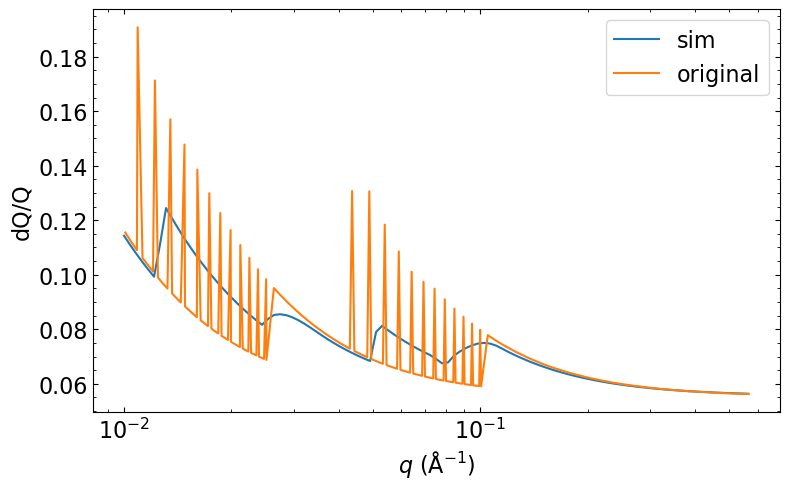

In [16]:
fig, ax = plt.subplots()

#i = 0
#while os.path.isfile('testdata.DAT'):
original = pandas.read_csv('bu/sim.dat', sep=' ', skip_blank_lines=True,comment='#')
simdata = pandas.read_csv('sim.dat', sep=' ', skip_blank_lines=True,comment='#')
ax.plot(simdata['Q'], (simdata['dQ']/simdata['Q']), label="sim")
ax.plot(original['Q'], (original['dQ']/original['Q']), label="original")

ax.legend(fontsize=16)
ax.set_ylabel("dQ/Q", fontsize=16)
ax.set_yscale('linear')
ax.set_xscale('log')
ax.minorticks_on()
ax.tick_params(which="both", direction="in", labelsize=16)
ax.tick_params(bottom=True, top=True, left=True, right=True, which="both")
ax.set_xlabel("$q$ (Å$^{-1}$)", fontsize=16)
ax.figure.set_size_inches(8., 5)
#ax.set_ylim(0, 0.01)
plt.tight_layout()
plt.savefig(store + "/resolution_comparison.png", facecolor="white")
plt.show()


In [17]:
simdata = fitobj.fnSimulateData(basefilename='sim.dat', liConfigurations=configuration, qmin=qmin, qmax=qmax, t_total=None, simpar=simpar, save_file=False, verbose=False, average=True)[0][1]
simdata

/Users/frank/opt/anaconda3/envs/Python39/lib/python3.9/site-packages/sasmodels/bumps_model.py:243: RuntimeWarning: invalid value encountered in divide
  return (self.theory() - self.Iq) / self.dIq
/Users/frank/opt/anaconda3/envs/Python39/lib/python3.9/site-packages/sasmodels/bumps_model.py:243: RuntimeWarning: divide by zero encountered in divide
  return (self.theory() - self.Iq) / self.dIq
/Users/frank/opt/anaconda3/envs/Python39/lib/python3.9/site-packages/sasmodels/bumps_model.py:243: RuntimeWarning: invalid value encountered in divide
  return (self.theory() - self.Iq) / self.dIq


,Q,I,dI,dQ
31,0.010000,0.038533,0.005385,0.001143
32,0.010395,0.031280,0.006802,0.001154
33,0.010806,0.034595,0.006546,0.001165
34,0.011234,0.046562,0.006300,0.001178
35,0.011678,0.027563,0.006063,0.001191
...,...,...,...,...
131,0.483226,0.000733,0.000121,0.027374
132,0.502333,0.000448,0.000119,0.028415
133,0.522196,0.000495,0.000146,0.029498
134,0.542844,0.000326,0.000204,0.030626


# Machine Learning
## Simulate Training Data

In [17]:
def prepare_model(rfile):

    fitobj = molstat.CMolStat(
    fitsource=fitsource,
    spath=setupdir,
    mcmcpath=store,
    runfile=rfile,
    state=None,
    problem=None,
    )

    if os.path.isdir(os.path.join(setupdir, store)):
        shutil.rmtree(os.path.join(setupdir, store))
    fitobj.Interactor.fnRunMCMC(500, 500, batch=False)

    fitobj.fnRestoreFit()

    return fitobj

def simulate_training_data(fitobj, configuration, name, number=10000):

    fitobj.fnRestoreFit()
    fitobj.fnLoadParameters()
    pf = pandas.DataFrame(fitobj.diParameters)

    train_x = []
    train_y = []
    for i in range(number):
        # randomly vary model parameters in fit ranges
        for par in pf:
            pf[par]['value'] = numpy.random.random() * (pf[par]['upperlimit'] - pf[par]['lowerlimit']) + pf[par]['lowerlimit']
        simpar = pandas.DataFrame(pf.loc['value'])
        simpar.reset_index(inplace=True)
        simpar.columns = ['par', 'value']

        # change buffer sb according to solvent sld of water
        cb = 0.9245 - 0.1348 * simpar.loc[simpar.par =='sld_solvent', 'value'].squeeze()
        if 'background' in simpar['par'].values:
            simpar.loc[simpar.par=='background', 'value'] = cb
            for subconfig in configuration[0]:
                subconfig['differential_cross_section_buffer'] = 0
        else:
            for subconfig in configuration[0]:
                subconfig['differential_cross_section_buffer'] = cb

        # simulate data
        simdata = fitobj.fnSimulateData(basefilename='sim.dat', liConfigurations=configuration, qmin=qmin, qmax=qmax, t_total=None, simpar=simpar, verbose=False, average=True)[0][1]

        train_x.append(simdata)
        train_y.append(simpar)

    fnSaveObject(train_x, "train_"+name+"_x.dat")
    fnSaveObject(train_y, "train_"+name+"_y.dat")

In [23]:
modellist = ['core_shell_cylinder', 'core_shell_ellipsoid', 'three_pearl_necklace', 'lamellar']

for model in modellist:
    fitobj = prepare_model(model)
    simulate_training_data(fitobj, configuration, model, number=10000)

No file: /Users/frank/Dropbox/My Mac (PN115993.campus.nist.gov)/Documents/programming/molgroups/examples/ml/EllipsoidProtein_SingleDataset/T/core_shell_cylinder.py
No state to reload.
# steps: 500, # draws: 35000
step 1 cost 585.43(17)
                                  length ........|.    180.372 in (10,200)
                                  radius .|........    32.8545 in (10,200)
                                   scale |.........  0.0931064 in (0.001,1)
                                sld_core |.........  -0.316688 in (-1,7)
                               sld_shell ..|.......    1.08929 in (-1,7)
                             sld_solvent .|........   0.433285 in (-1,7)
                               thickness .|........    31.2144 in (10,200)
step 29 cost 1.56(17)
step 77 cost 1.17(17)
step 127 cost 1.12(17)
step 177 cost 1.12(17)
step 227 cost 1.11(17)
step 276 cost 1.11(17)
step 326 cost 1.08(17)
step 375 cost 1.08(17)
step 425 cost 1.08(17)
step 476 cost 1.03(17)
step 525 cost 1.

## Single-Model Learning